In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

## PLOTTING HISTOGRAMS

Text(0, 0.5, 'Number of Jobs')

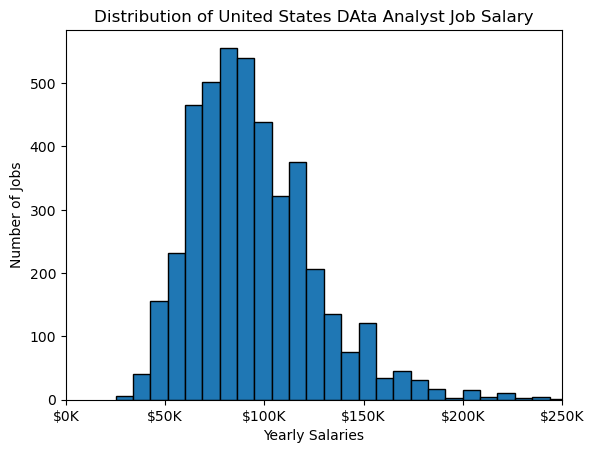

In [3]:
df_DA['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 250000)

plt.title('Distribution of United States DAta Analyst Job Salary')
plt.xlabel('Yearly Salaries')
plt.ylabel("Number of Jobs")

## BOX PLOTS


In [3]:
df_DA_box = df_DA.dropna(subset='salary_year_avg')

<Axes: >

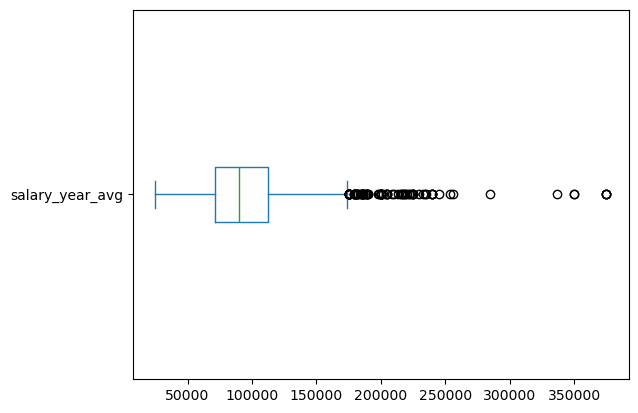

In [5]:
df_DA_box['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\Mr. Juanpaulo\AppData\Local\Temp\ipykernel_10388\2078369330.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


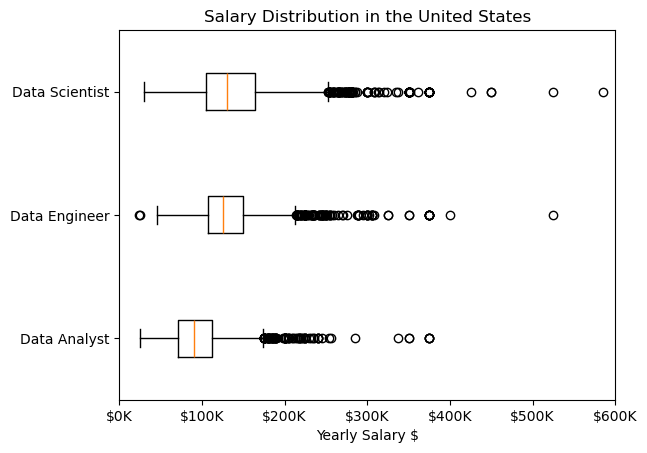

In [32]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()

df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary $")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()